In [33]:
import pandas as pd
d=pd.read_json('aggregated_2021_01_2021_02_22_feb.json')

In [34]:
d.columns

Index(['campaign_id', 'campaign_name', 'objective', 'reach',
       'actions_landing_page_view', 'actions_app_custom_event.other',
       'actions_comment', 'actions_app_custom_event.fb_mobile_activate_app',
       'actions_onsite_conversion.post_save', 'actions_link_click',
       ...
       'ws4 (Sales in USD)', 'ws6 (Unique users)', 'ws6 (Event counter)',
       'ws6 (Sales in USD)', 'actions_offsite_conversion.fb_pixel_purchase',
       'actions_app_custom_event.fb_mobile_purchase', 'actions_omni_purchase',
       'actions_purchase', 'actions_app_custom_event.fb_mobile_level_achieved',
       'actions_omni_level_achieved'],
      dtype='object', length=187)

In [3]:
dna=d.loc[d['Total Cost']=="N/A"]
##how many cases with N/A in total cost we have?
print('how many cases with N/A in total cost we have? ',len(dna),'\nwhat is the percentage ? ',round(len(dna)/len(d)*100,2),'%')

how many cases with N/A in total cost we have?  9 
what is the percentage ?  6.34 %


In [4]:
d['Total Cost']=d['Total Cost'].replace("N/A",'0.9')
d['Total Cost']=pd.to_numeric(d['Total Cost'], downcast="float")
d['ROAS']=d['Total Revenue']/d.spend#d['Total Cost']

In [5]:
d.campaign_id.unique()

array([6243296405824, 6246177575224, 6246342322224, 6246191687424,
       6247216180624, 6247217665424, 6254544161624, 6256193255224])

### Splitting the campaigns 

In [6]:
d1=d.loc[d['campaign_id']==6243296405824]
t1=pd.DataFrame()
t1['date']=d1.date_start#pd.to_datetime(d1.date_start).dt.day
#t1['impressions']=d1.impressions
t1['Camp1']=d1.ROAS

In [7]:
d2=d.loc[d['campaign_id']==6246177575224]
t2=pd.DataFrame()
#t2['impressions']=d2.impressions
t2['Camp2']=d2.ROAS
t2['date']=d2.date_start#pd.to_datetime(d2.date_start).dt.day

In [8]:
d3=d.loc[d['campaign_id']==6246342322224]
t3=pd.DataFrame()
#t3['impressions']=d3.impressions
t3['Camp3']=d3.ROAS
t3['date']=d3.date_start#pd.to_datetime(d3.date_start).dt.day

In [9]:
d4=d.loc[d['campaign_id']==6246191687424]
t4=pd.DataFrame()
#t4['impressions']=d4.impressions
t4['Camp4']=d4.ROAS
t4['date']=d4.date_start

In [10]:
d5=d.loc[d['campaign_id']==6247216180624]
t5=pd.DataFrame()
#t5['impressions']=d5.impressions
t5['Camp5']=d5.ROAS
t5['date']=d5.date_start

In [11]:
d6=d.loc[d['campaign_id']==6247217665424]
t6=pd.DataFrame()
#t6['impressions']=d6.impressions
t6['Camp6']=d6.ROAS
t6['date']=d6.date_start

In [12]:
d7=d.loc[d['campaign_id']==6247216180624]
t7=pd.DataFrame()
#t7['impressions']=d7.impressions
t7['Camp7']=d7.ROAS
t7['date']=d7.date_start

In [13]:
d8=d.loc[d['campaign_id']==6256193255224]
t8=pd.DataFrame()
#t8['impressions']=d8.impressions
t8['Camp8']=d8.ROAS
t8['date']=d8.date_start
#t8['date']=pd.to_datetime(d8['date_start']).dt.day

In [14]:
df = pd.merge(t1, t2, how='outer' ,on='date')
df=pd.merge(df, t3, how='outer', on='date')
df=pd.merge(df, t4, how='outer', on='date')
df=pd.merge(df, t5, how='outer', on='date')
df=pd.merge(df, t6, how='outer', on='date')
#df=pd.merge(df, t7, how='outer', on='date')
#df=pd.merge(df, t8, how='outer', on='date')

In [16]:
#df=df.rename(columns={'roas_x':'Camp1', "roas_y": "Camp2", "roas": "Camp3"})
df=df.drop(['date'], axis=1)
df=df.fillna(0)
df

,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6
0,0.000000,2.304738,0.362762,0.0,0.000000,0.000000
1,0.255021,0.161991,2.262144,0.0,0.000000,0.000000
2,0.000000,2.360890,0.885666,0.0,0.000000,0.000000
3,0.000000,1.442068,3.016258,0.0,1.128234,0.000000
4,2.537755,1.617572,0.129946,0.0,0.000000,0.000000
5,0.255903,0.000000,0.550102,0.0,0.238127,0.000000
6,1.845896,1.629227,0.988457,0.0,0.000000,0.000000
7,0.000000,1.020422,1.741862,0.0,0.000000,0.000000
8,0.000000,0.000000,1.430644,0.0,0.000000,0.000000
9,0.000000,0.325646,0.695966,0.0,0.862013,0.000000


In [111]:
print('Campaign 1:  ',df.Camp1.mean(),' +- ',df.Camp1.std())
print('Campaign 2:  ',df.Camp2.mean(),' +- ',df.Camp2.std())
print('Campaign 3:  ',df.Camp3.mean(),' +- ',df.Camp3.std())

Campaign 1:   0.5382638474891784  +-  0.9018108770178782
Campaign 2:   0.521466413965169  +-  0.770079954792022
Campaign 3:   0.997023700961595  +-  0.8703471948642328


In [17]:
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# plt.plot(df.Camp1, norm.pdf(df.Camp1,df.Camp1.mean(),df.Camp1.std()))
# plt.show()

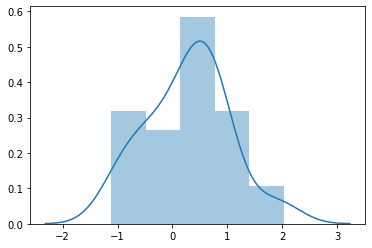

In [18]:
import numpy as np
import seaborn as sns
value = np.random.normal(loc=df.Camp1.mean(),scale=df.Camp1.std(),size=30)
sns.distplot(value)

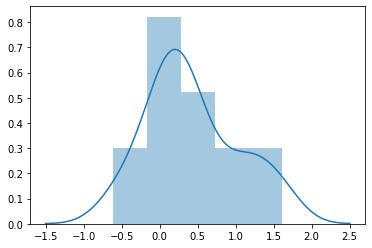

In [19]:
value = np.random.normal(loc=df.Camp2.mean(),scale=df.Camp2.std(),size=30)
sns.distplot(value)

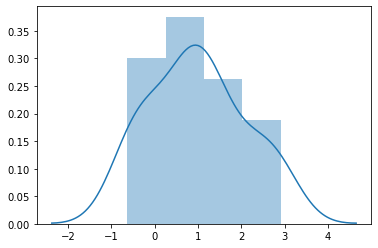

In [20]:
value = np.random.normal(loc=df.Camp3.mean(),scale=df.Camp3.std(),size=30)
sns.distplot(value)



Rewards By Machine =  [0.0, 0.16199063231850117, 14.398216728628945, 0.0, 0.0, 0.0]

Total Rewards by UCB =  14.560207360947448

Machine Selected At Each Round By UCB: 
 [0, 1, 2, 3, 4, 5, 2, 2, 2, 2, 1, 2, 0, 3, 4, 5, 2, 2, 2, 2, 1, 2, 2, 0, 3, 4, 5, 2, 2, 2, 2, 2, 2, 1]


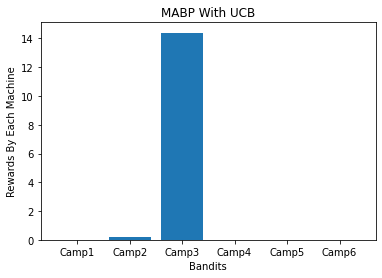

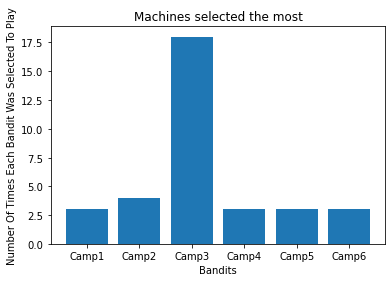

In [23]:

# Upper Confidence Bound
import math
import matplotlib.pyplot as plt
import pandas as pd

data = df#pd.read_csv("UCBbandits.csv")

observations = 34
machines = 6
numbers_of_selections_of_each_machine = [0] * machines
sums_of_rewards_for_each_machine = [0] * machines
machines_selected = []
total_rewards = 0

for n in range(observations):
    bandit = 0
    max_upper_bound = 0
    
    for i in range(machines):
        if (numbers_of_selections_of_each_machine[i] > 0):        
            average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])           
            upper_bound = average_reward + di
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
   
    machines_selected.append(bandit) 
    numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
    reward = data.values[n, bandit]
    sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
    total_rewards = total_rewards + reward

print("\n\nRewards By Machine = ", sums_of_rewards_for_each_machine)
print("\nTotal Rewards by UCB = ", total_rewards)
print("\nMachine Selected At Each Round By UCB: \n", machines_selected)


#Visualizing the rewards of each machine
plt.bar(['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()

#Visualizing the selections of each machine
plt.bar(['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'],numbers_of_selections_of_each_machine)
plt.title('Machines selected the most')
plt.xlabel('Bandits')
plt.ylabel('Number Of Times Each Bandit Was Selected To Play')
plt.show()

### get the information of the budget for each campaign

In [24]:
budget=pd.read_json('campaigns_daily_budget.json')
budget.id

0     6257103083624
1     6257101423824
2     6256978831424
3     6256193255224
4     6255456278224
5     6254544161624
6     6254350475824
7     6247222216624
8     6247217665424
9     6247217077624
10    6247216180624
11    6246342322224
12    6246191687424
13    6246177575224
14    6244378654624
15    6244374903624
16    6243989322624
17    6243502038024
18    6243296405824
19    6239736526424
20    6239406784624
21    6239399712824
22    6238915200024
23    6238763952824
24    6235717851624
Name: id, dtype: int64

In [ ]:
budget.status

In [25]:
#db=budget.loc[budget['status'] =='ACTIVE'] 
db=pd.DataFrame()
db['campaign_id']=budget['id'].loc[budget['status'] =='ACTIVE']
db['daily_budget']=budget['daily_budget'].loc[budget['status'] =='ACTIVE']
db

,campaign_id,daily_budget
0,6257103083624,2500
1,6257101423824,3000
2,6256978831424,4500
4,6255456278224,7000
5,6254544161624,0
6,6254350475824,17500
21,6239399712824,0
23,6238763952824,0


In [26]:
db.campaign_id.unique()

array([6257103083624, 6257101423824, 6256978831424, 6255456278224,
       6254544161624, 6254350475824, 6239399712824, 6238763952824])

In [27]:
d.campaign_id.unique()

AttributeError: 'int' object has no attribute 'campaign_id'

In [28]:
list(set(d.campaign_id.unique()).intersection(db.campaign_id.unique()))

AttributeError: 'int' object has no attribute 'campaign_id'

## Adset budget

In [29]:
adset_budget=pd.read_json('addsets_fisk.json')
adset_budget.budget_remaining

0      326
1      659
2      472
3      360
4      264
5     2000
6     2000
7     3330
8     4000
9     3818
10    3592
11    2000
12    2000
13    1500
14    1500
15    3000
16    2000
17    2000
18    3000
19    2000
20    1500
21    3000
22    2000
23    2000
24    7500
Name: budget_remaining, dtype: int64

In [30]:
db2=pd.DataFrame()
db2['campaign_id']=adset_budget['campaign_id'].loc[budget['status'] =='ACTIVE']
db2['daily_budget']=adset_budget['budget_remaining'].loc[budget['status'] =='ACTIVE']
db2

,campaign_id,daily_budget
0,6257103083624,326
1,6257101423824,659
2,6256978831424,472
4,6256978831424,264
5,6256193255224,2000
6,6256193255224,2000
21,6247217077624,3000
23,6247216180624,2000


In [32]:
list(set(db2.campaign_id.unique()).intersection(d.campaign_id.unique()))

AttributeError: 'int' object has no attribute 'campaign_id'

1.019666990168809
1.2837127533066595
1.2837127533066595
1.442026886600883
1.442026886600883
1.442026886600883
1.5537557300461198
1.5537557300461198
1.5537557300461198
1.5537557300461198
1.6394020872995383
1.6394020872995383
1.6394020872995383
1.6394020872995383
1.6394020872995383
1.7084686779636815
1.7084686779636815
1.7084686779636815
1.7084686779636815
1.7084686779636815
1.7084686779636815
1.7661150337732119
1.7661150337732119
1.2488319167365465
1.7661150337732119
1.7661150337732119
1.7661150337732119
1.815443985917585
1.815443985917585
1.048147073968205
1.815443985917585
1.815443985917585
1.815443985917585
1.8584610944249194
1.8584610944249194
0.9292305472124597
1.8584610944249194
1.8584610944249194
1.8584610944249194
1.8965344471423544
1.8965344471423544
0.8481559890960573
1.8965344471423544
1.8965344471423544
1.8965344471423544
1.9306371939548872
1.3651666518564685
0.8634072011145147
1.9306371939548872
1.9306371939548872
1.9306371939548872
1.9614851608391803
1.3869794584261703
0.8

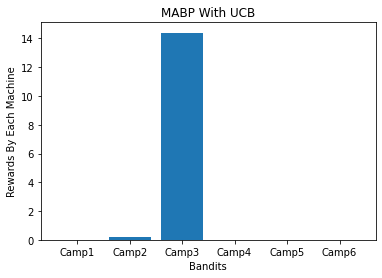

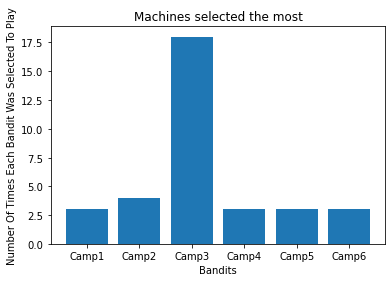

In [42]:

# Upper Confidence Bound
import math
import matplotlib.pyplot as plt
import pandas as pd

data = df#pd.read_csv("UCBbandits.csv")

observations = 34
machines = 6
numbers_of_selections_of_each_machine = [0] * machines
sums_of_rewards_for_each_machine = [0] * machines
machines_selected = []
total_rewards = 0

for n in range(observations):
    bandit = 0
    max_upper_bound = 0
    
    for i in range(machines):
        if (numbers_of_selections_of_each_machine[i] > 0):        
            average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])           
            upper_bound = average_reward + di
        ### update the budget here as well 
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
   
    machines_selected.append(bandit) 
    numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
    reward = data.values[n, bandit]
    sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
    total_rewards = total_rewards + reward

print("\n\nRewards By Machine = ", sums_of_rewards_for_each_machine)
print("\nTotal Rewards by UCB = ", total_rewards)
print("\nMachine Selected At Each Round By UCB: \n", machines_selected)


#Visualizing the rewards of each machine
plt.bar(['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()

#Visualizing the selections of each machine
plt.bar(['Camp1','Camp2','Camp3','Camp4','Camp5','Camp6'],numbers_of_selections_of_each_machine)
plt.title('Machines selected the most')
plt.xlabel('Bandits')
plt.ylabel('Number Of Times Each Bandit Was Selected To Play')
plt.show()

### get the information of the budget for each campaign

In [80]:
budget=pd.read_json('campaigns_daily_budget.json')
budget.id

0     6257103083624
1     6257101423824
2     6256978831424
3     6256193255224
4     6255456278224
5     6254544161624
6     6254350475824
7     6247222216624
8     6247217665424
9     6247217077624
10    6247216180624
11    6246342322224
12    6246191687424
13    6246177575224
14    6244378654624
15    6244374903624
16    6243989322624
17    6243502038024
18    6243296405824
19    6239736526424
20    6239406784624
21    6239399712824
22    6238915200024
23    6238763952824
24    6235717851624
Name: id, dtype: int64

In [81]:
budget.status

0     ACTIVE
1     ACTIVE
2     ACTIVE
3     PAUSED
4     ACTIVE
5     ACTIVE
6     ACTIVE
7     PAUSED
8     PAUSED
9     PAUSED
10    PAUSED
11    PAUSED
12    PAUSED
13    PAUSED
14    PAUSED
15    PAUSED
16    PAUSED
17    PAUSED
18    PAUSED
19    PAUSED
20    PAUSED
21    ACTIVE
22    PAUSED
23    ACTIVE
24    PAUSED
Name: status, dtype: object

In [84]:
#db=budget.loc[budget['status'] =='ACTIVE'] 
db=pd.DataFrame()
db['campaign_id']=budget['id'].loc[budget['status'] =='ACTIVE']
db['daily_budget']=budget['daily_budget'].loc[budget['status'] =='ACTIVE']
db

,campaign_id,daily_budget
0,6257103083624,2500
1,6257101423824,3000
2,6256978831424,4500
4,6255456278224,7000
5,6254544161624,0
6,6254350475824,17500
21,6239399712824,0
23,6238763952824,0


In [86]:
db.campaign_id.unique()

array([6257103083624, 6257101423824, 6256978831424, 6255456278224,
       6254544161624, 6254350475824, 6239399712824, 6238763952824])

In [97]:
d.campaign_id.unique()

array([6243296405824, 6246177575224, 6246342322224, 6246191687424,
       6247216180624, 6247217665424, 6254544161624, 6256193255224])

In [99]:
list(set(d.campaign_id.unique()).intersection(db.campaign_id.unique()))

[6254544161624]

## Adset budget

In [48]:
adset_budget=pd.read_json('addsets_fisk.json')
adset_budget
test=adset_budget.loc[adset_budget['campaign_id'] ==6256978831424]
test.id


2    6257054640224
3    6257054344824
4    6256978834224
Name: id, dtype: int64

In [50]:
db2=pd.DataFrame()
db2['campaign_id']=adset_budget['campaign_id'].loc[budget['status'] =='ACTIVE']
db2['adset_budget']=adset_budget['daily_budget'].loc[budget['status'] =='ACTIVE']
db2['adset_id']=adset_budget['id'].loc[budget['status'] =='ACTIVE']
db2['remaining_budget']=adset_budget['budget_remaining'].loc[budget['status'] =='ACTIVE']
db2

,campaign_id,adset_budget,adset_id,remaining_budget
0,6257103083624,2500,6257103083424,326
1,6257101423824,3000,6257101424824,659
2,6256978831424,1500,6257054640224,472
4,6256978831424,1500,6256978834224,264
5,6256193255224,2000,6256193255624,2000
6,6256193255224,2000,6256193254624,2000
21,6247217077624,3000,6247217076624,3000
23,6247216180624,2000,6247216180824,2000


In [132]:
list(set(db2.campaign_id.unique()).intersection(db.campaign_id.unique()))

[6257103083624, 6256978831424, 6257101423824]

In [35]:
list(set(db2.campaign_id.unique()).intersection(d.campaign_id.unique()))

[6247216180624, 6256193255224]

### Reallocate budget 

In [ ]:
r=pd.DataFrame()
r['old_position']=
r['current_budget']=
r['total_budget']=
r['new_position']=
r['new_position_index']=
for i in r:
    if r.old_position[i]==r.new_position_index[i]:
        r['new_budget'][i]=r['current_budget'][i]
    elif r.old_position[i]<r.new_position_index[i]:
        r['new_budget'][i]=r['current_budget'][i] +(r['new_position'][i]-r['new_position'][r.old_position[i]-1])*r['total_budget'][i]
    else:
        r['new_budget'][i]=r['current_budget'][i] -(r['new_position'][i]-r['new_position'][r.old_position[i]-1])*r['total_budget'][i]
    
        
    